# GRIP Task 3: To Explore Unsupervised Machine Learning (K-Means Clustering)

# By Sayani Roy

## Problem: 
### To predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset

## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
data = pd.read_csv("C:/Users/Shelly/Downloads/iris.csv")

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Summarising the Dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Checking the Summary Statistics

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Viewing the Labels in "Species"

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Checking the number of Observations for each Species

In [8]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Checking for Null Values

In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking the Dimensions of the dataframe

In [10]:
data.shape

(150, 6)

## Pairplots

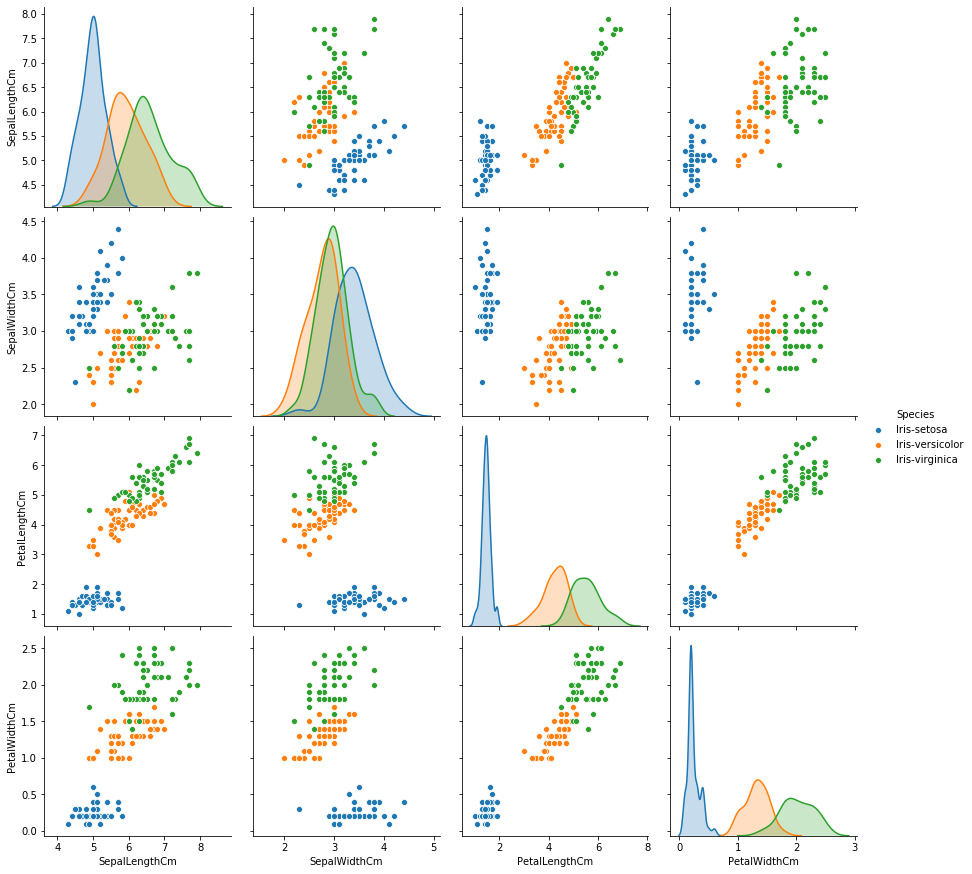

In [11]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

## Plotting Correlation Matrix

In [13]:
data.drop('Id', axis=1, inplace=True)

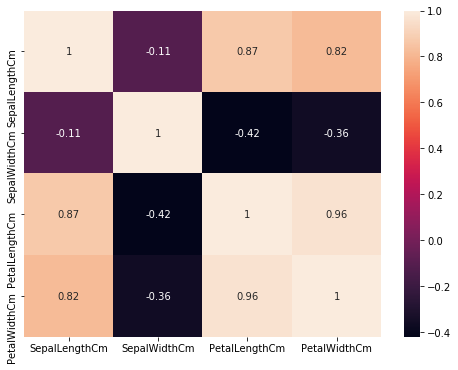

In [50]:
corr = data.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True)

#### From the above heatmap, we can see that petal width and petal length have the highest correlation of 0.96

## Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001659317FA48>,
      dtype=object)

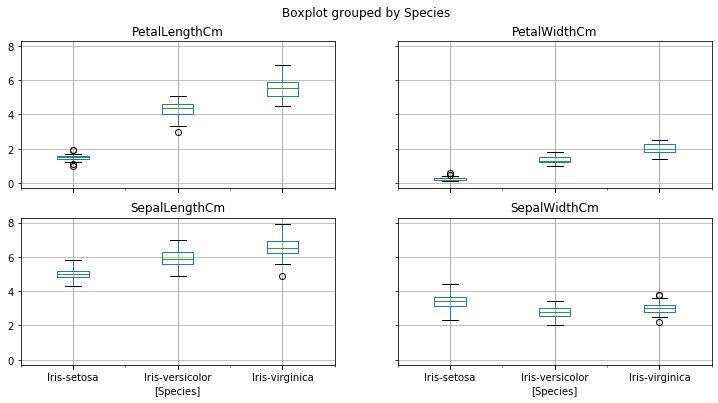

In [33]:
data.boxplot(by="Species", figsize=(12,6))

#### From the above plots, we observe that Petal width and Petal length of the flowers vary more than Sepal length and Sepal width across the three species.
#### So, we will form our clusters according to the measurements of Petal width and Petal length.

#### Now let us plot the Petal Length and Petal Width for all the observations, based on their Species:

## Scatterplot between Petal Length and Petal Width

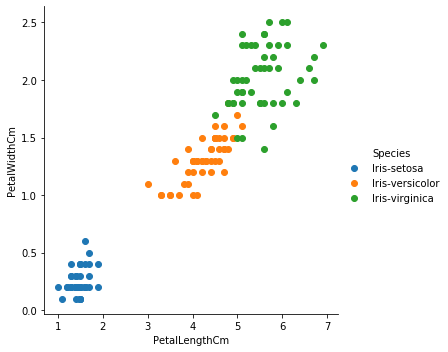

In [44]:
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

# K-Means:

## Preparing the Data

In [15]:
X = data.iloc[:, [0,1,2,3]].values

## Using the elbow method to find the optimal number of clusters

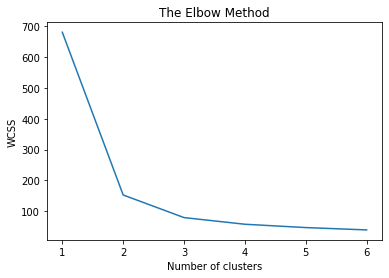

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above graph we observe that the optimal number of clusters is 3.

## Training the K-Means model on the dataset

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Cross-Tabulation

In [31]:
df=pd.DataFrame({'Species':data['Species'],'kmeans':y_kmeans})
df

,Species,kmeans
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,0
147,Iris-virginica,2
148,Iris-virginica,2


In [34]:
df['kmeans'].value_counts()

0    62
1    50
2    38
Name: kmeans, dtype: int64

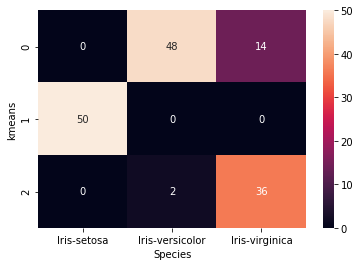

In [36]:
crosstab=pd.crosstab(df['kmeans'],df['Species'])
sns.heatmap(crosstab, annot=(True)

#### Based on the above heatmap, we assign cluster 1 to iris-setosa, cluster 0 to iris-versicolor and cluster 2 to iris-virginica. 

#### Here, 16 out of 150 observations have been wrongly classified.

## Visualising the clusters - on the features 'Petal length' and 'Petal Width'

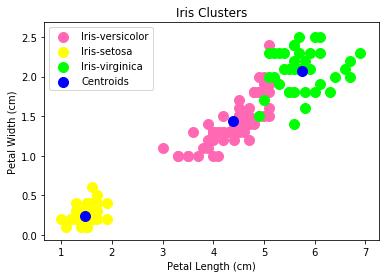

In [22]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'hotpink', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'lime', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'blue', label = 'Centroids')
plt.title('Iris Clusters')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

#### The above graph is quite similar to the scatterplot between the 'Petal length' and 'Petal width' done above. 
#### This confirms that our cluster assignments are correct and also implies that our model is quite accurate.
#### To be precise, our model has predicted 134 out of a total 150 observations correctly, so the accuracy score of this model is 89.33%